# Homework 1 Grading Scheme

1. Use `load_breast_cancer()` dataset: (10)  

  1. Get the dataset from [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) (10)
  2. Maybe give the points if they get it from somewhere else but it's the same dataset?


2. Study the dataset, provide pairwise graphs for a select number of features and the target (20) 

  1. Show some rows (5)
  2. Check feature types or comment about feature types (5)
  3. Check missing values (5)
  4. Plot pairwise graphs (5)

  NOTE: A, B and C "could" go into the next section, although it makes more sense to do this before plotting the graphs
  

3. Preprocess the data, create a pipeline (20)  

  1. Split into training and testing (7.5)
  2. Standardize (7.5)
  3. Create pipeline (5)
  
  
4. Classify the dataset using KNN (20)   

  1. Create a class instance, or use the Pipeline (5)
  2. Call `.fit()` on the training data (7.5)
  3. Call `.score()` method on the testing data (7.5)
  
  
5. Provide accuracy on varying number of neighbors, show the training and testing data graph (30)  

  1. Get a dictionary with key=n_neighbors and value=accuracy on testing data (list also works) (15)
  2. Plot the training and testing accuracies vs n_neighbors (15)

Apart from this, give partial points if the implementation of some of these steps is not correct. Like for example, standardizing before splitting. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 1.

In [17]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data["feature_names"])
df["target"] = data["target"]


# 2. 

## A

In [4]:
df[df.columns[:20]].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [4]:
df[df.columns[20:]].head()

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## B

In [5]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

All numeric and target already encoded. Good

## C

In [6]:
df.replace("?", np.NaN, inplace=True)  # In case the missing values are encoded as "?" (the usual for UCI)

In [7]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

No missing values.

## D

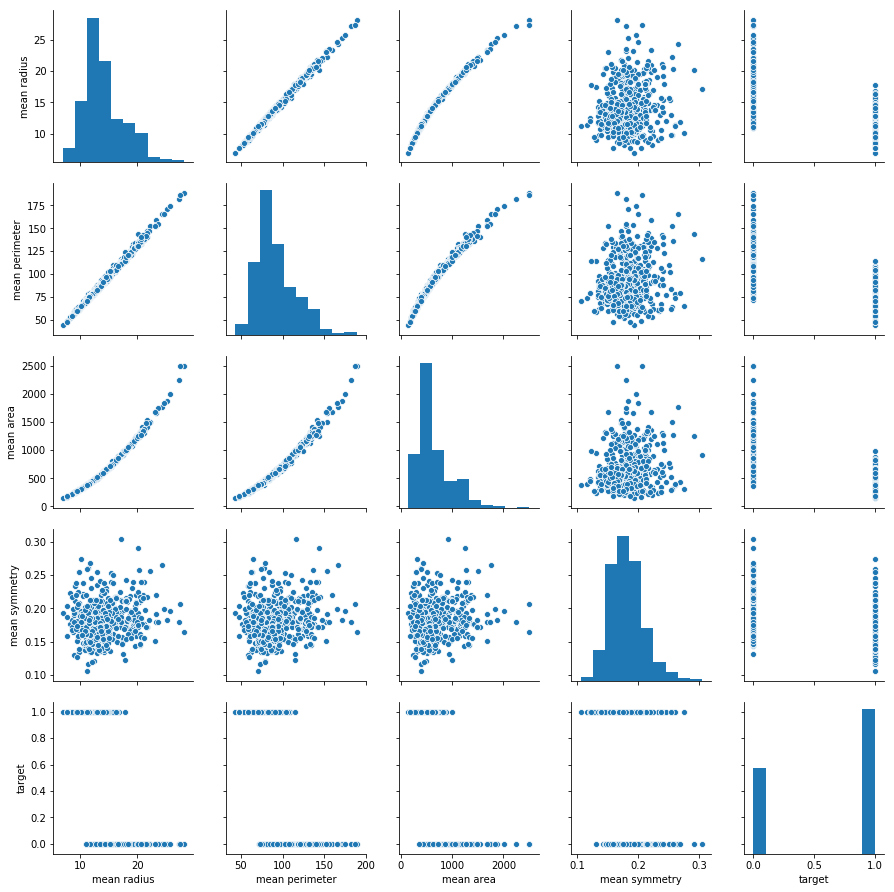

In [9]:
sns.pairplot(df[["mean radius", "mean perimeter", "mean area", "mean symmetry", "target"]])
plt.show()

# 3.

## A

In [10]:
X = df.drop("target", axis=1).values
y = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## B

In [11]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## C

In [12]:
pipe = Pipeline([("StandardScaler", StandardScaler()), ("clf", KNeighborsClassifier())])

# 4.

## A

In [12]:
knn = KNeighborsClassifier()

## B

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## C

In [14]:
knn.score(X_test, y_test)

0.9473684210526315

# 5.

# A

In [15]:
scores_train = {}
scores_test = {}
for nn in range(2, 15):
    knn = KNeighborsClassifier(nn)
    knn.fit(X_train, y_train)
    scores_train[nn] = knn.score(X_train, y_train)
    scores_test[nn] = knn.score(X_test, y_test)
    
# The Pipeline can also be used but it would be more computationally expensive
# As the standardization would be called everytime inside the loop

## B

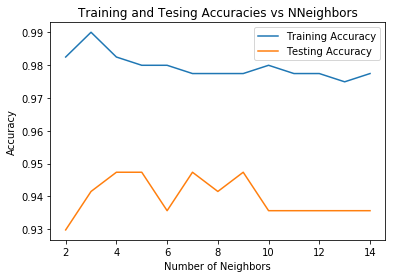

In [16]:
plt.title("Training and Tesing Accuracies vs NNeighbors")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.plot(scores_train.keys(), scores_train.values(), label="Training Accuracy")
plt.plot(scores_train.keys(), scores_test.values(), label="Testing Accuracy")
plt.legend()
plt.show()

4 neighbors seems to be the best choice. Still, would need cross-validation before making the final choice. 